Hours	0.50  |	0.75  |	1.00  |	1.25  |	1.50  |	 1.75  |   1.75  |  2.00  | 	2.25 |	2.50 |	2.75 |	3.00 |	3.25 |	3.50 |	4.00 |	4.25 |	4.50 |	4.75 |	5.00 |	5.50 |
<br>
Pass	0 |	0 |	0 |	0 |	0 |	0 |	1 |	0 |	1 |	0 |	1 |0 |1 |	0 |	1 |	1 |	1 |	1 |	1 |	1

In general, to do: 1. Link tutorials. 2. comments, doc strings. 3. report 4. questions 

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac <br>
https://predictiveprogrammer.com/machine-learning-from-scratch-logistic-regression/

In [1]:
import numpy as np
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]]) 
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

In [2]:
X_train, y_train, X_test, y_test = X[:15], y[:15], X[15:], y[15:]

## 1. Hypothesis. <br>
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

In [3]:
def sigmoid(X,theta):
    z = np.dot(X, theta[0]) + theta[1]
    #print(z)
    return 1 / (1 + np.exp(-z))


weights = [np.random.rand(X.shape[1], 1),np.zeros((1,))]
h = sigmoid(X,weights)

In [4]:
weights

[array([[0.33021132]]), array([0.])]

In [5]:
h

array([[0.5411829 ],
       [0.56160009],
       [0.58181079],
       [0.60175048],
       [0.62135817],
       [0.6405771 ],
       [0.72921312],
       [0.8275702 ],
       [0.6405771 ],
       [0.74520248],
       [0.8390338 ],
       [0.65935532],
       [0.67764617],
       [0.69540858],
       [0.71260734],
       [0.76055772],
       [0.7893223 ],
       [0.80272256],
       [0.81546975],
       [0.86010499]])

## 2. Loss function <br>
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

To do: understand loss function and fix it possibly

In [6]:
def loss_(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [7]:
loss_(h, y)

0.8189412166591064

## 3. Gradient descent <br>
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

In [8]:
gradient = np.dot(X.T, (h - y)) / y.shape[0]

In [9]:
gradient

array([[ 2.1054066,  2.1054066,  2.1054066,  2.1054066,  2.1054066,
         2.1054066, -0.6820934,  2.1054066, -0.6820934,  2.1054066,
        -0.6820934,  2.1054066, -0.6820934,  2.1054066, -0.6820934,
        -0.6820934, -0.6820934, -0.6820934, -0.6820934, -0.6820934]])

In [10]:
weights

[array([[0.33021132]]), array([0.])]

To do: understand calculating gradient -> shouldn't be the same as linear reg? see

In [11]:
def LogisticRegression(X,y,old_theta,alpha,treshold):
    loss_list = []

    theta = old_theta.copy()

    loss = loss_(sigmoid(X,theta),y)
    loss_update = 0

    index = 0

    
    while(abs(loss-loss_update)> treshold):
    #while(index<50):
            
            h = sigmoid(X,theta)
            
            gradient = np.dot(X.T, (h - y)) / y.shape[0]
            #print(gradient)
            theta[0] -= alpha * gradient
            #print('theta update', theta)
            theta[1] -= alpha * np.mean(h-y)
            
            h = sigmoid(X,theta)
            
            loss = loss_update
            loss_update=loss_(h,y)
            loss_list.append(loss_update)
            #print([loss,loss_update])
            
            index+=1


    print('GD stopped at loss %s, with coefficients: %s' % (loss,theta), 'index', index)
    return theta,loss_list

In [28]:
old_theta = [np.random.rand(X_train.shape[1]),np.zeros((1,))]
learning_rate = 0.9
loss_treshold = 0.001
theta, loss = LogisticRegression(X_train,y_train,old_theta,learning_rate,loss_treshold)

GD stopped at loss 0.5785958227001309, with coefficients: [array([0.39449148]), array([-1.48190368])] index 25


In [29]:
theta

[array([0.39449148]), array([-1.48190368])]

In [30]:
loss

[0.6967104699081853,
 0.6565298310869803,
 0.6438217054514442,
 0.6346258407917317,
 0.62789915870218,
 0.6222570880932162,
 0.6173790215467064,
 0.6130384585255066,
 0.6091319804301064,
 0.6055915139627559,
 0.6023707651223381,
 0.5994343002589312,
 0.5967528456646538,
 0.5943014671716144,
 0.5920582055277384,
 0.5900036097909609,
 0.588120254302949,
 0.5863925140631182,
 0.58480632189418,
 0.583349007712038,
 0.582009138587066,
 0.5807763914204064,
 0.5796414339123235,
 0.5785958227001309,
 0.5776319108977883]

In [31]:
y_pred = sigmoid(X_test, theta)

In [32]:
y_pred

array([0.47472568, 0.52399711, 0.54851813, 0.57280579, 0.66547723])

In [33]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print (y_pred)

[0. 1. 1. 1. 1.]


Mean squared error: 0.20


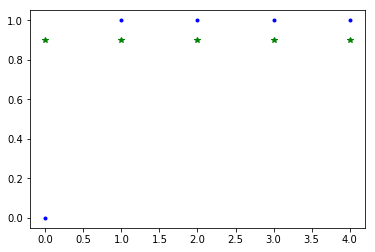

In [36]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


plt.plot(y_test - 0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()


plt.show()

In [37]:
import pandas as pd
results_data = {'True':y_test, 'Predicted':y_pred}
results = pd.DataFrame(results_data,columns = ['True','Predicted'])

In [38]:
results

,True,Predicted
0,1,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


In [40]:
print ("ACCURACY = ",(y_pred== y_test).mean())

ACCURACY =  0.8
